In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
IMAGE_DIR = os.path.realpath("images")

## Person Visualization

The garments were taken from the models depicted below.

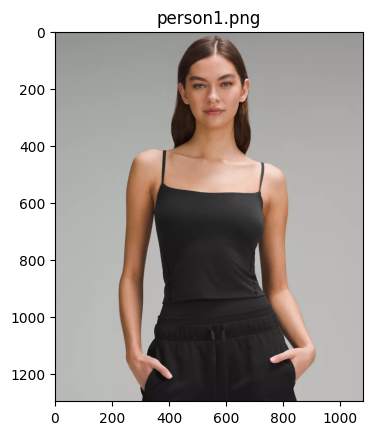

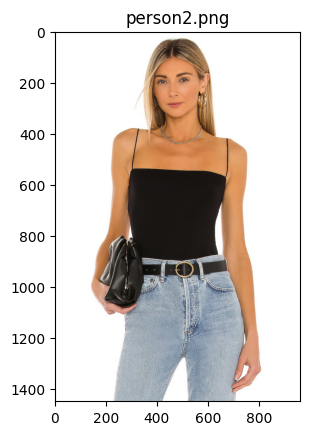

In [3]:
person_files = ["person1.png", "person2.png"]

for file in person_files:
    img = cv2.imread(os.path.join(IMAGE_DIR, file))
    plt.imshow(img[:,:,::-1])
    plt.title(file)
    plt.show()

## Segmented Garment Visualization

Garments were segmented using the Segment Anything Model (SAM). The segmented images are depicted below.

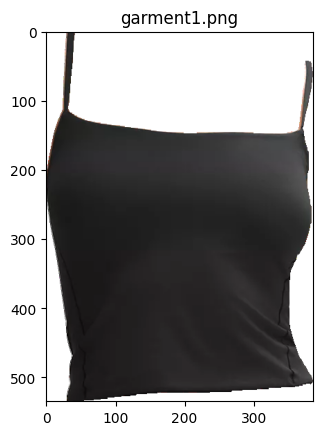

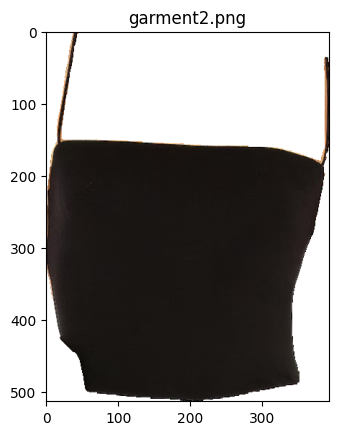

In [4]:
garment_files = ["garment1.png", "garment2.png"]

for file in garment_files:
    img = cv2.imread(os.path.join(IMAGE_DIR, file))
    plt.imshow(img[:,:,::-1])
    plt.title(file)
    plt.show()

## Remove Strap

The code below implements 2 different ways of removing the straps.

1. Given a binary mask of the garment `G` (created by thresholding the garment mask shown above), we can remove thin straps by eroding the mask for `K` iterations (until the straps are gone) and dilating the resulting mask `K` iterations.

2. Given an inpainting mask (created by eroding the binary garment mask `G` and subtracting the result from `G`), we can take the distance transform (using L2 distance). Then we can threshold the the distance transform mask and dilate the result to produce the final mask. 

In [6]:
def load_garment_mask(file):
    mask = cv2.imread(os.path.join(IMAGE_DIR, file))
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    mask = (255 * (mask > 128)).astype(np.uint8)
    return mask

def load_inpaint_mask(file):
    mask = cv2.imread(os.path.join(IMAGE_DIR, file))
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    mask = (255 * (mask > 128)).astype(np.uint8)
    kernel = np.ones((3,3), np.uint8)
    sub_mask = mask.copy()
    sub_mask = cv2.erode(sub_mask, kernel, iterations=15)
    return mask - sub_mask

def remove_strap_given_garment_mask(mask):
    new_mask = mask.copy()
    kernel = np.ones((3,3), np.uint8)
    new_mask = cv2.erode(new_mask, kernel, iterations=5)
    new_mask = cv2.dilate(new_mask, kernel, iterations=5)
    plt.subplot(1,2,1)
    plt.imshow(mask)
    plt.title("Before")
    plt.axis("off")
    plt.subplot(1,2,2)
    plt.imshow(new_mask)
    plt.title("After")
    plt.axis("off")
    plt.show()

def remove_strap_given_inpaint_mask(inpaint_mask):
    dist = cv2.distanceTransform(inpaint_mask, cv2.DIST_L2, 3)
    cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)
    dist_mask = (255 * (dist > 0.5)).astype(np.uint8)
    kernel = np.ones((3,3), np.uint8)
    dist_mask = cv2.dilate(dist_mask, kernel, iterations=5)
    plt.subplot(1,3,1)
    plt.imshow(inpaint_mask)
    plt.title("Inpaint Mask")
    plt.axis("off")
    plt.subplot(1,3,2)
    plt.imshow(dist)
    plt.axis("off")
    plt.title("Distance Transform")
    plt.subplot(1,3,3)
    plt.imshow(dist_mask)
    plt.axis("off")
    plt.title("Thresholded")
    plt.show()

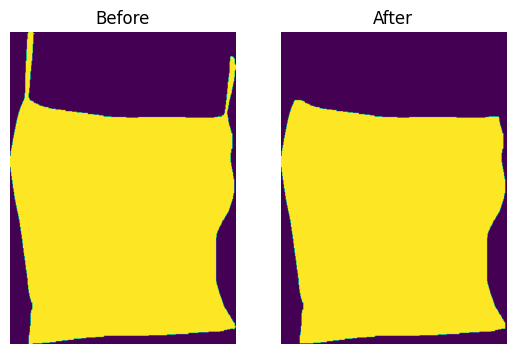

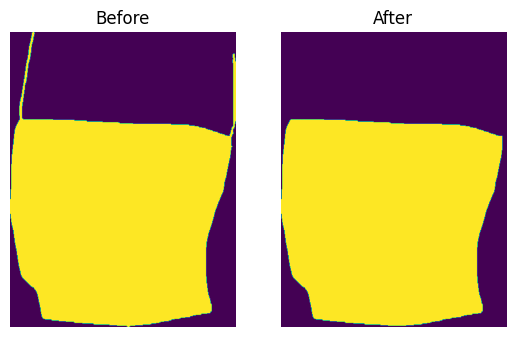

In [7]:
mask_files = [
    "garment1_mask.png",
    "garment2_mask.png",
]

for file in mask_files:
    mask = load_garment_mask(file)
    remove_strap_given_garment_mask(mask)

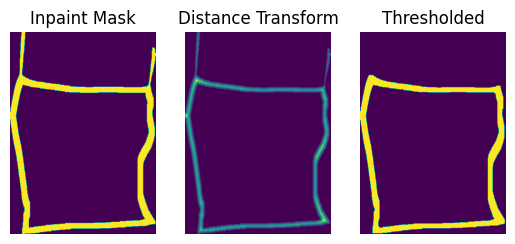

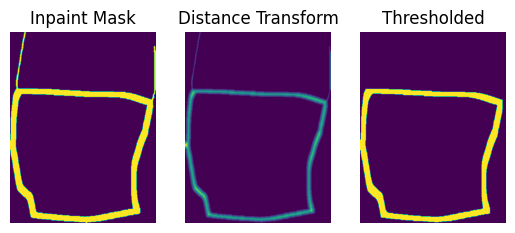

In [8]:
for file in mask_files:
    mask = load_inpaint_mask(file)
    remove_strap_given_inpaint_mask(mask)